In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option("display.float_format", "{:.2f}".format) # para que display redondeado
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=14, titlepad=10)

In [2]:
path = r"C:\Users\gonza\OneDrive\Documentos\datascience-thebridge-master\ejercicios gonzalo\DATA\WA_Fn-UseC_-HR-Employee-Attrition.csv"

df = pd.read_csv(path)
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


In [3]:
# target columns = 	Attrition
# is null
null = df.isnull().sum() 
null[null > 0] # no hay nulos

Series([], dtype: int64)

In [4]:
# no nos sirven
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [5]:
#describe
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,...,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,2.72,65.89,2.73,2.06,2.73,6502.93,...,3.15,2.71,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,1.09,20.33,0.71,1.11,1.10,4707.96,...,0.36,1.08,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,1009.00,...,3.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,2.00,48.00,2.00,1.00,2.00,2911.00,...,3.00,2.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,3.00,66.00,3.00,2.00,3.00,4919.00,...,3.00,3.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,4.00,83.75,3.00,3.00,4.00,8379.00,...,3.00,4.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,4.00,100.00,4.00,5.00,4.00,19999.00,...,4.00,4.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [6]:
# trabajadores cansados versus no: creamos un dataframe con la media de ambos
attrition_yes = df.loc[df["Attrition"] == "Yes"].mean()
attrition_no = df.loc[df["Attrition"] == "No"].mean()


In [7]:
df_mean_attrition = pd.concat((attrition_yes,attrition_no),axis=1)
df_mean_attrition.columns = ["Yes","No"]
df_mean_attrition.round(2).style.background_gradient(cmap='tab20c_r',axis=1)

,Yes,No
Age,33.610000,37.560000
DailyRate,750.360000,812.500000
DistanceFromHome,10.630000,8.920000
Education,2.840000,2.930000
EnvironmentSatisfaction,2.460000,2.770000
HourlyRate,65.570000,65.950000
JobInvolvement,2.520000,2.770000
JobLevel,1.640000,2.150000
JobSatisfaction,2.470000,2.780000
MonthlyIncome,4787.090000,6832.740000


Text(0, 0.5, 'Frecuency')

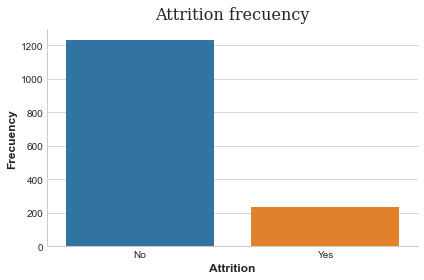

In [8]:
# vemos frecuency de nuestra clase a predecir
font = {'family': 'serif',        
        'weight': 'normal',
        'size': 16,
        }

df_class = df["Attrition"].value_counts().reset_index()
sns.barplot(x="index",y="Attrition",data=df_class)
sns.despine()
plt.title("Attrition frecuency",fontdict=font)
plt.xlabel("Attrition")
plt.ylabel("Frecuency")

In [9]:
# convertimos primero y en numerico
y_dict = {"Yes":1,"No":0}
df["Attrition_numeric"] = df["Attrition"].map(y_dict)
df.drop("Attrition",axis=1,inplace=True)

In [10]:
# col numericas usando describe
num_col = df.describe().columns.tolist()

In [11]:
## corr
corr = df[num_col].corr()

In [12]:
#to_frame().style.background_gradient(cmap='viridis')
corr.style.background_gradient(cmap='Blues')

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numeric
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.159205
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,-0.056652
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.077924
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.031373
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,-0.103369
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123,-0.006846
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976,-0.130016
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281,-0.169105
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,0.000644,-0.055699,0.020002,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656,-0.103481
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,0.034814,0.149515,-0.027269,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079,-0.159840


In [13]:
# vemos hay multicolianiedad; por ejemplo vemos que los años en la compañia(years..) esta relacionada con muchas variables: sueldo...
# por ello tenemos que valorar hacer un pca u otro procedimiento para reducir un poco las features

In [14]:
# hay muchas features que estan correlacioneadas; veamos categoricas (tenemos que ver si hay muchas unique)
df.describe(include="object")

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,1470,1470,1470,1470,1470,1470,1470
unique,3,3,6,2,9,3,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No
freq,1043,961,606,882,326,673,1054


In [15]:
 #categorical cols
 cat_cols = df.describe(include="object").columns.tolist()

### cambiar este modelo, buscar cosas mas concretas (hombre,mujer..)
https://www.kaggle.com/janiobachmann/attrition-in-an-organization-why-workers-quit

### desmenuzar la grafica en vez de hacerlo todo a la vez

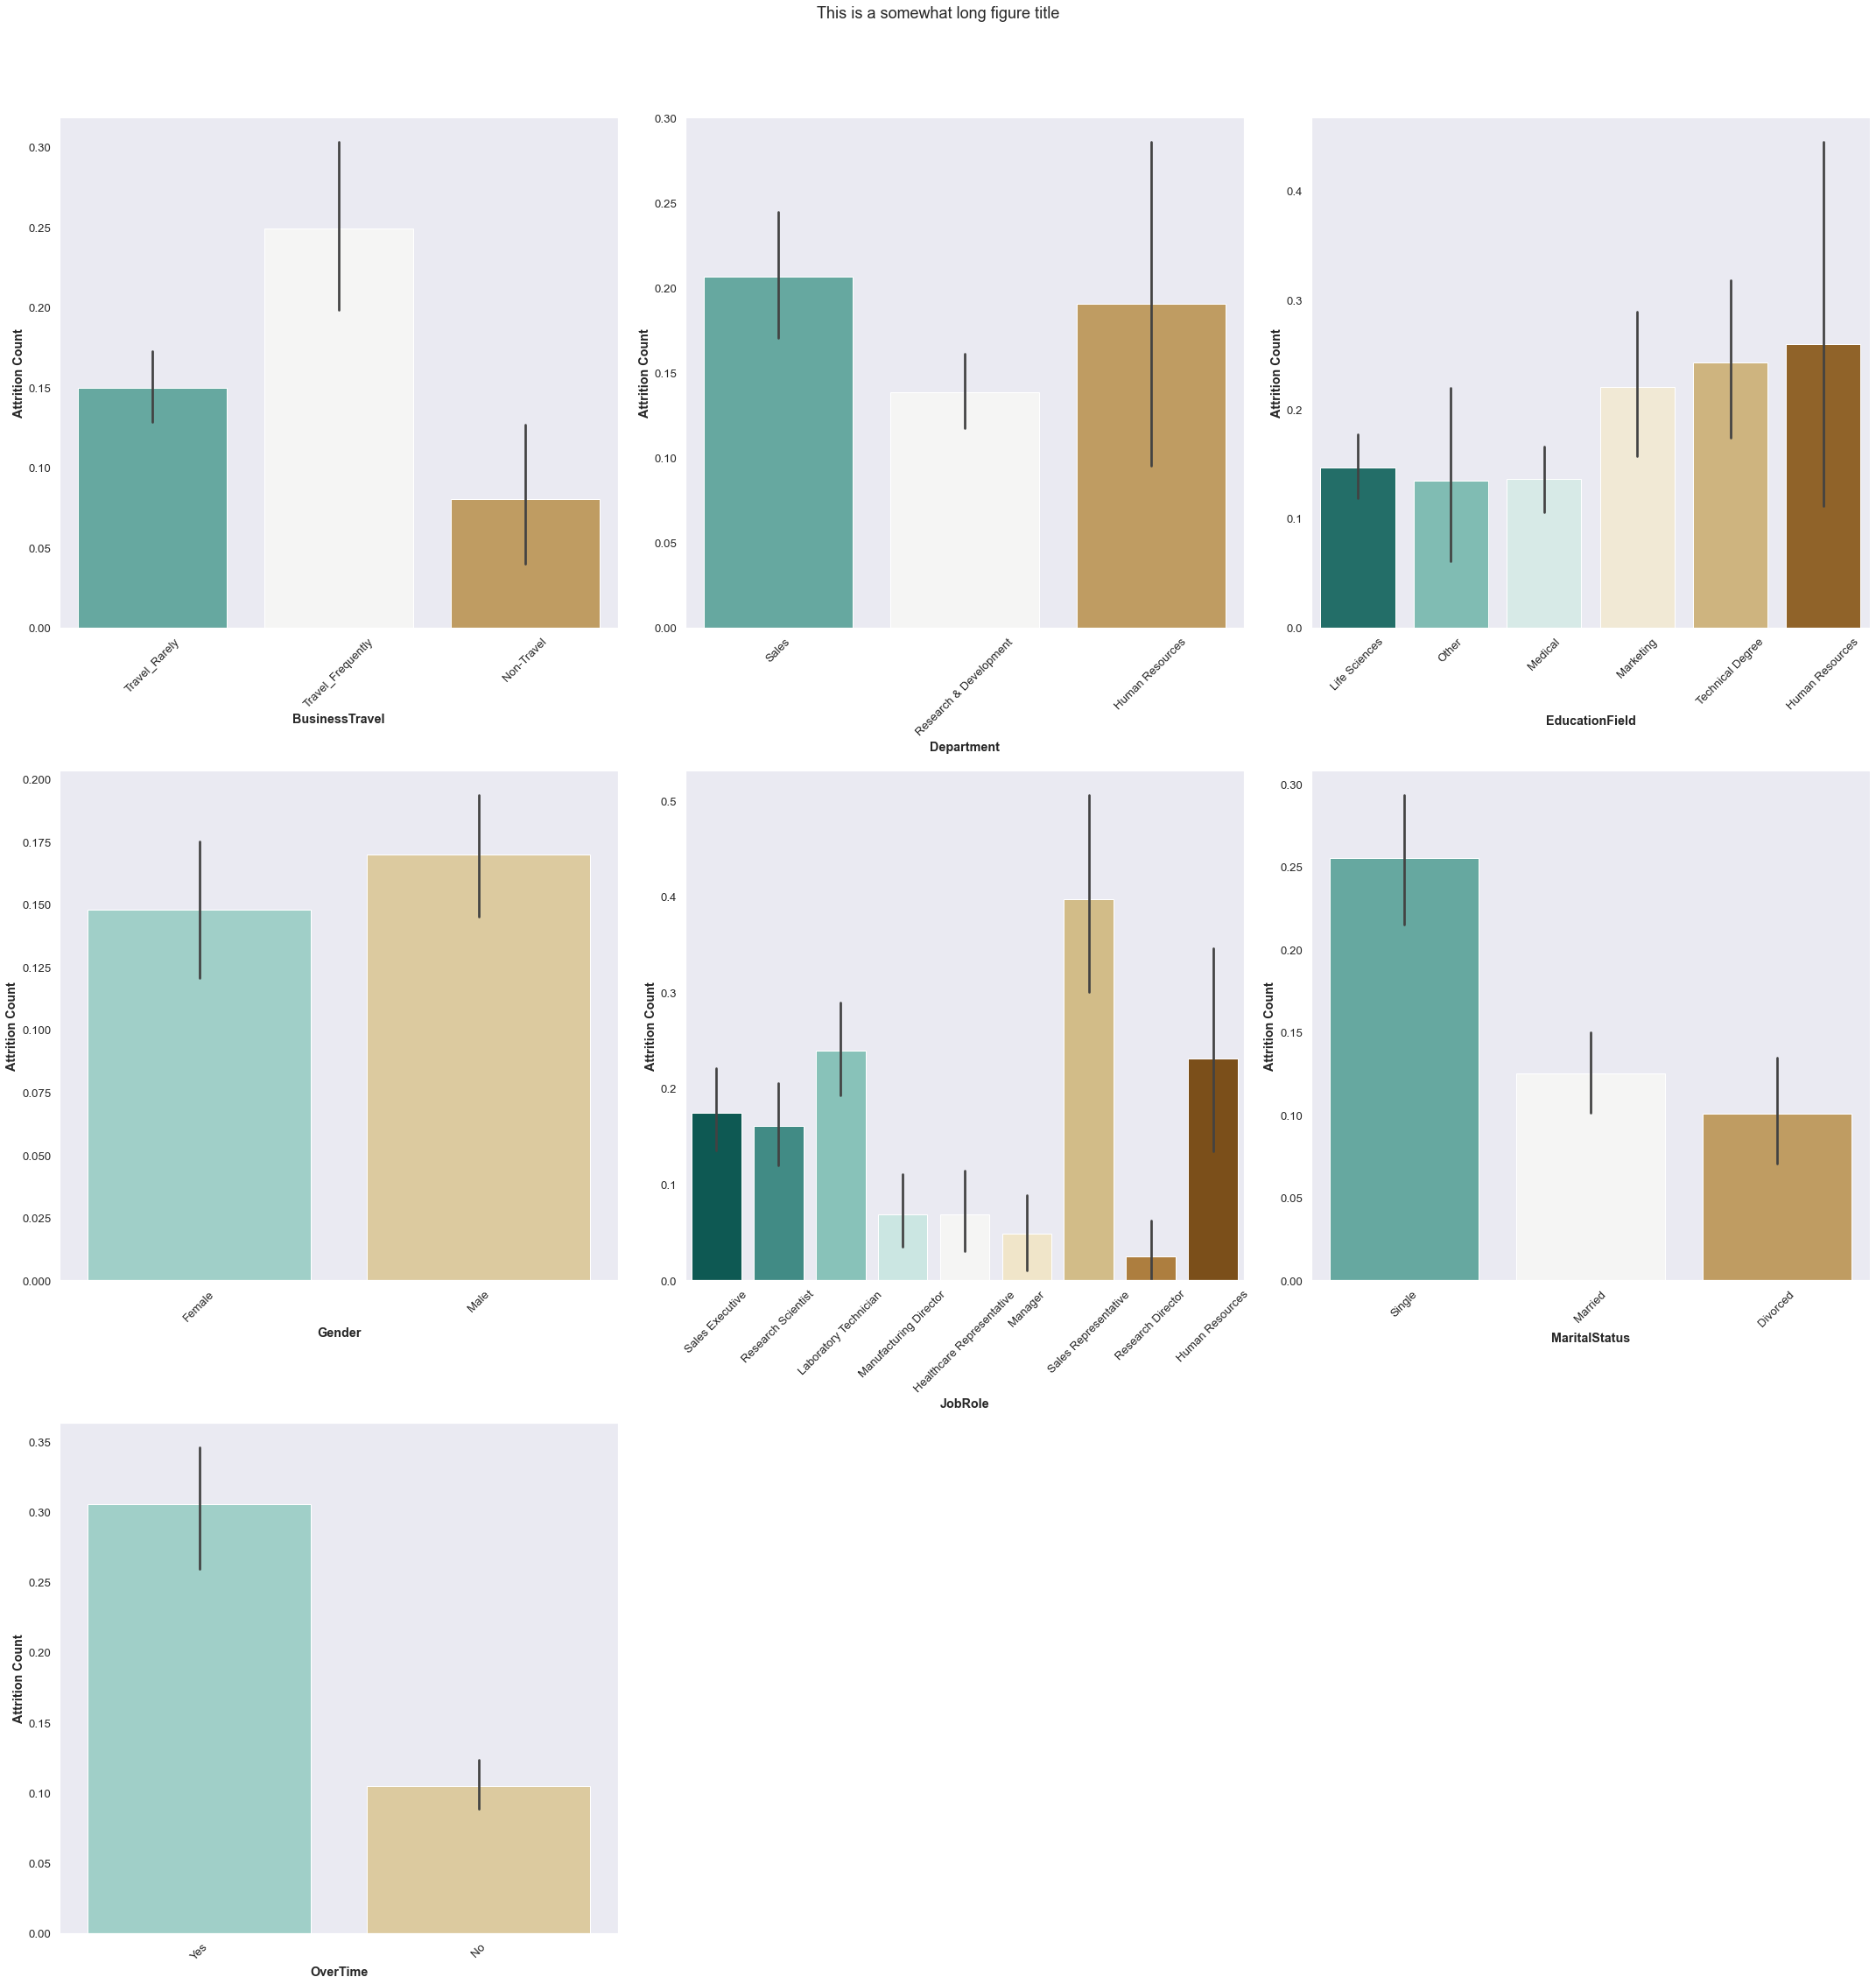

In [16]:
# veamos graficando la relacion que tienen con y
# Plotting how every feature correlate with the "target"
sns.set(font_scale=1.2)
plt.figure(figsize=(30, 30))
plt.suptitle('This is a somewhat long figure title',fontsize=18,y=1.05)
 # ojo cambiar


for i, column in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)
    g = sns.barplot(x=f"{column}", y='Attrition_numeric', data=df,palette='BrBG_r')
    g.set_xticklabels(g.get_xticklabels(), rotation=45)
    plt.ylabel('Attrition Count')
    plt.xlabel(f'{column}')
    plt.grid(False)
    

In [17]:
# aqui vemos una serie de cosas interesantes: una persona que viaja mucho por trabajo, mayoritariamente en ventas, un poco mas hombres que mujeres, hace horas extras y soltero.

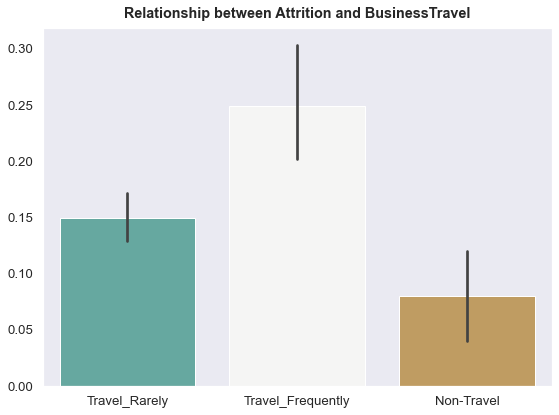

In [46]:
# bussines travel
plt.figure(figsize=(8,6))
g = sns.barplot(x="BusinessTravel", y='Attrition_numeric', data=df,palette='BrBG_r')
plt.ylabel('')
plt.title("Relationship between Attrition and BusinessTravel")
plt.xlabel("")
plt.grid(False)

In [ ]:
# We found that employees who are more likely to travel for work are more likely to resign.

### crear una funcion con jobrole y hacer varias graficas chulas 

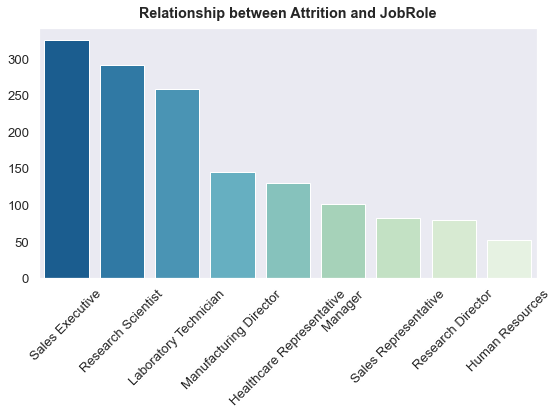

In [39]:
# bussines travel
JobRole = (df[["JobRole",'Attrition_numeric']].groupby("JobRole")['Attrition_numeric'].count().  
                                                reset_index().   
                                                sort_values(by='Attrition_numeric',ascending=False))



#plot
plt.figure(figsize=(8,6))
g = sns.barplot(x="JobRole", y='Attrition_numeric', data=JobRole,palette='GnBu_r')
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.ylabel('')
plt.title("Relationship between Attrition and JobRole")
plt.xlabel("")
plt.grid(False)

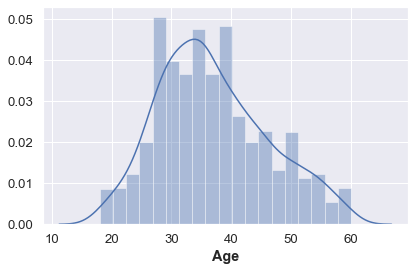

In [45]:
for a in ["Age",TypeError: distplot() got an unexpected keyword argument 'x]
sns.distplot(df["Age"])

In [48]:
sns.__version__

'0.10.1'